# Проверка гипотез по увеличению выручки в интернет-магазине - оценка результатов А/В-теста

Перед нами данные крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Задачи, которые нам предстоит выполнить:**

Часть 1. [Приоритизация гипотез.](#section_id_1.1)

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задачи:
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.]

Часть 2. [Анализ A/B-теста.](#section_id_2.1)

Задачи:
1. [Выполнить предобработку данных.](#section_id_1)
2. [Построить график кумулятивной выручки по группам. Сделать выводы и предположения.](#section_id_2)
3. [Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.](#section_id_3)
4. [Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.](#section_id_4)
5. [Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.](#section_id_5)
6. [Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.](#section_id_6)
7. [Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.](#section_id_7)
8. [Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.](#section_id_8)
9. [Построить точечный график стоимостей заказов. Сделать выводы и предположения.](#section_id_9)
10. [Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.](#section_id_10)
11. [Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.](#section_id_11)
12. [Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.](#section_id_12)
13. [Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.](#section_id_13)
14. [Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.](#section_id_14)
15. [Принять решение по результатам теста и объяснить его.](#section_id_15)

Часть 3. [Общий вывод.](#section_id_3.1)

**Описание данных**

Файл **`hypothesis.csv`**:</br>
* `Hypothesis` - краткое описание гипотезы;</br>
* `Reach` - охват пользователей по 10-балльной шкале;</br>
* `Impact` - влияние на пользователей по 10-балльной шкале;</br>
* `Confidence` - уверенность в гипотезе по 10-балльной шкале;</br>
* `Efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале.</br>

Файл **`orders.csv`**:</br>
* `transactionId` — идентификатор заказа;</br>
* `visitorId` — идентификатор пользователя, совершившего заказ;</br>
* `date` — дата, когда был совершён заказ;</br>
* `revenue` — выручка заказа;</br>
* `group` — группа A/B-теста, в которую попал заказ.</br>

Файл **`visitors.csv`**:</br>
* `date` — дата;</br>
* `group` — группа A/B-теста;</br>
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.</br>

## 1. Приоритизация гипотез.<a id='section_id_1.1'></a>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from matplotlib.pyplot import figure

Изучим файл с гипотезами. Приведём названия столбцов к нижнему регистру.

In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),
    pd.read_csv('orders.csv'), 
    pd.read_csv('visitors.csv')
)
except: FilePathError

hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')
pd.options.display.max_colwidth = 150
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


### 1.1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [3]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head(9)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


8-я гипотеза самая перспективная. Затем идут 0, 7 и 6. Гипотезы 3 и 4 наименее приоритетные.

### 1.2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(9)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы: 7, 2 и 0. Наименее - 5 и 4.

### 1.3. Как изменилась приоритизация гипотез при применении RICE вместо ICE.

Оба метода говорят о том, что 7-я и 0-я гипотезы дают высокий приоритет. Так же оба подхода выявили, что 4-я гипотеза имеет небольшой приоритет. Разница подходов состоит в том, что фреймворк RICE имеет множитель reach в числителе. Гипотеза №2 имеет параметр reach равный 8, что и дало этой гипотезе выйти вперёд в методе RICE.

## 2. Анализ A/B-теста.<a id='section_id_2.1'></a>

### 2.1. Выполним предобработку данных.<a id='section_id_1'></a>

* Приведём дату к новому формату.

In [5]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

* Сколько групп в нашем тесте?

In [6]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

В тесте 2 группы. Перед нами парный тест.

* Определим дату начала и окончания теста.

In [7]:
print('Группа А:',
    (visitors[visitors['group'] == 'A']['date'].min()),
     (visitors[visitors['group'] == 'A']['date'].max()),
     'Группа В:',
     (visitors[visitors['group'] == 'B']['date'].min()),
     (visitors[visitors['group'] == 'B']['date'].max()))

Группа А: 2019-08-01 00:00:00 2019-08-31 00:00:00 Группа В: 2019-08-01 00:00:00 2019-08-31 00:00:00


Дата начала исследования: 2019-08-01. Дата окончания исследования: 2019-08-01.

* Определим сколько пользователей в каждой группе.

In [8]:
print('Количество пользователей группы А:', orders[orders['group'] == 'A']['visitorId'].nunique())
print('Количество пользователей группы B:', orders[orders['group'] == 'B']['visitorId'].nunique())

Количество пользователей группы А: 503
Количество пользователей группы B: 586


Группы отличаются на ~14%, группы можно считать достаточно сбалансированными.

* Проверим нет в тесте пользователей, учавствовавших в обоих группах одновременно.

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
table_A = orders[orders['group'] == 'A']
table_B = orders[orders['group'] == 'B']
table_visitors = table_A.merge(table_B, on='visitorId', how='inner')
table_visitors['visitorId'].nunique()

58

Получилось много пользователей, входящих в обе группы. В группе А 503 пользователя и ~ 11% из них входит в группу В. Это очень много. По хорошему таких пользователей необходимо удалить. Но удалив их из orders они не уйдут из visitors, откуда их удалить не получится, так как там нет их Id. Таким образом, удалив данные мы исказим картину, поэтому в данном исследовании рациональнее их оставить.

* Проверим данные на наличие пропусков.

In [11]:
pd.DataFrame(round(orders.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
transactionId,0.000000
visitorId,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [12]:
pd.DataFrame(round(visitors.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
group,0.000000
visitors,0.000000


* Проверим данные на наличие дубликатов.

In [13]:
print('Количество дубликатов в orders:', orders.duplicated().sum(), 
      'Количество дубликатов в visitors:', visitors.duplicated().sum())

Количество дубликатов в orders: 0 Количество дубликатов в visitors: 0


* Соберем кумулятивные данные

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitorId': 'nunique',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

### 2.2. Построим график кумулятивной выручки по группам.<a id='section_id_2'></a>

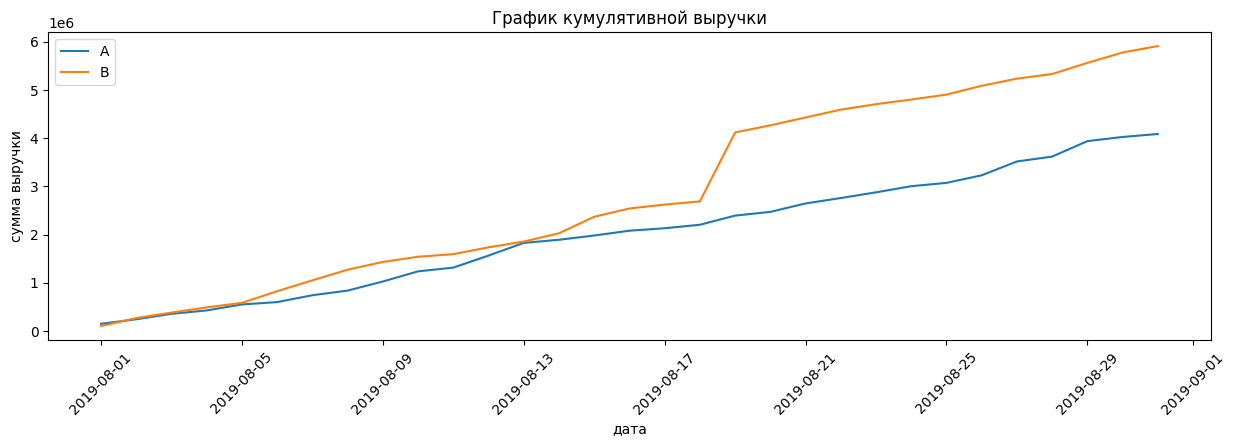

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки')
plt.xlabel('дата')
plt.ylabel('сумма выручки')
plt.xticks(rotation=45)
plt.legend();

В середине теста группа В вышла сильно вперёд и продолжала возрастать до окончания теста. Вероятно аномальные значения могут играть роль в её пользу.

### 2.3. Построим график кумулятивного среднего чека по группам.<a id='section_id_3'></a>

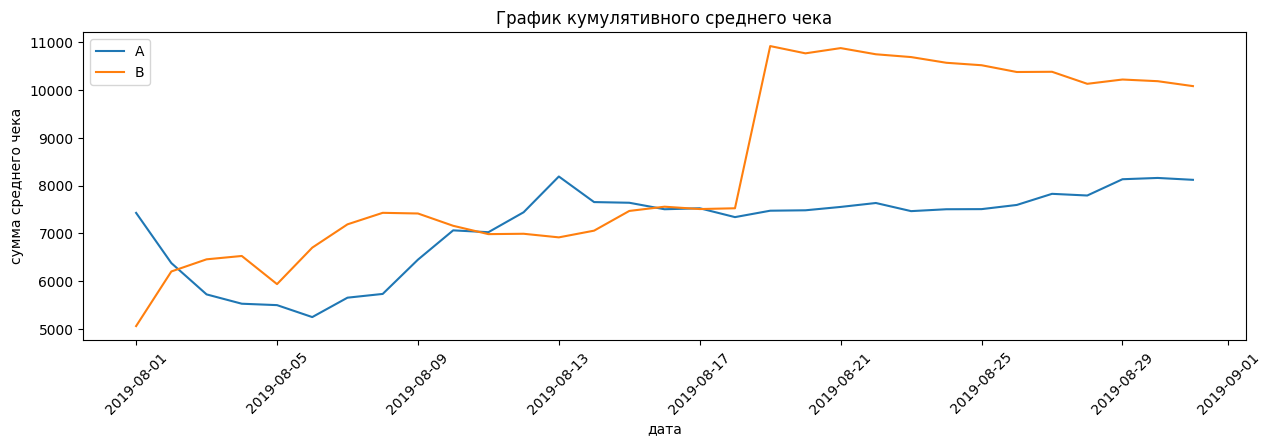

In [16]:
plt.figure(figsize=(15,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека')
plt.xlabel('дата')
plt.ylabel('сумма среднего чека')
plt.xticks(rotation=45)
plt.legend();

На графике можно видеть подтверждение предыдущего графика, который отразил возрастание сегмента В. На второй половине теста кумулятивный средний чек резко растёт, что может объяснить какая-нибудь аномально крупная покупка.

### 2.4. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.<a id='section_id_4'></a>

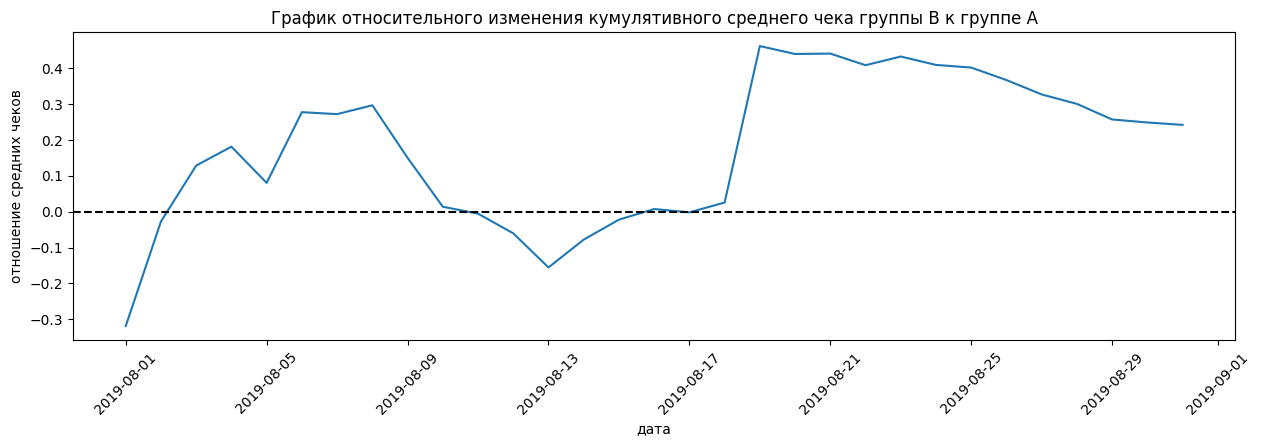

In [17]:
plt.figure(figsize=(15,4))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('отношение средних чеков')
plt.xticks(rotation=45);

Результаы теста на изменение среднего чека резко менялись в некоторые даты. Скорее всего в эти даты были совершены дорогие покупки.

### 2.5. Построим график кумулятивного среднего количества заказов на посетителя по группам.<a id='section_id_5'></a>

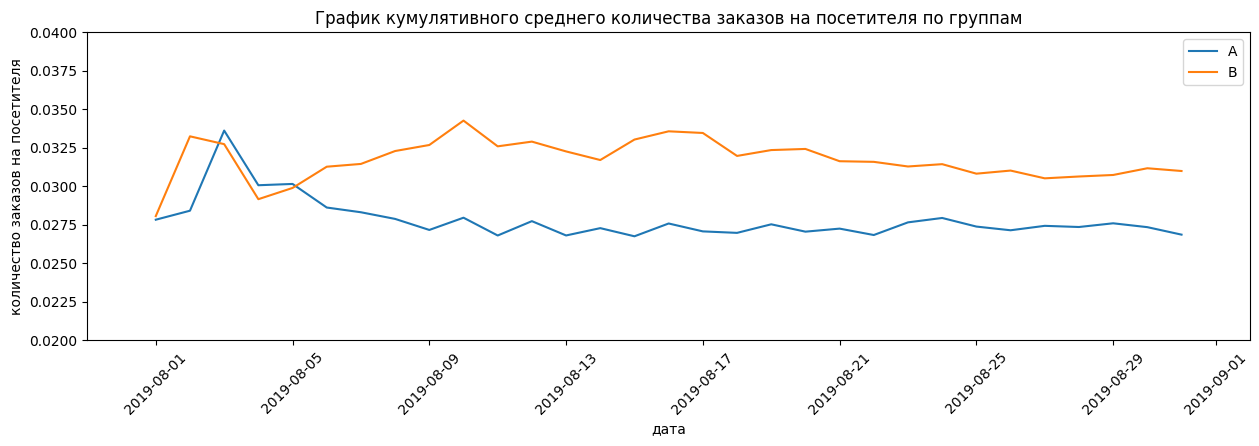

In [18]:
plt.figure(figsize=(15,4))
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('количество заказов на посетителя')
plt.xticks(rotation=45)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 7, 30), dt.datetime(2019, 9, 2), 0, 0.05])
plt.ylim([0.02, 0.04]);

В начале теста можно наблюдать резкий скачок кумулятивного среднего количества заказов на посетителя в обеих группах. Но после стабилизации сегмент В показал бо́льшее среднее, чем сегмент А.

### 2.6. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.<a id='section_id_6'></a>

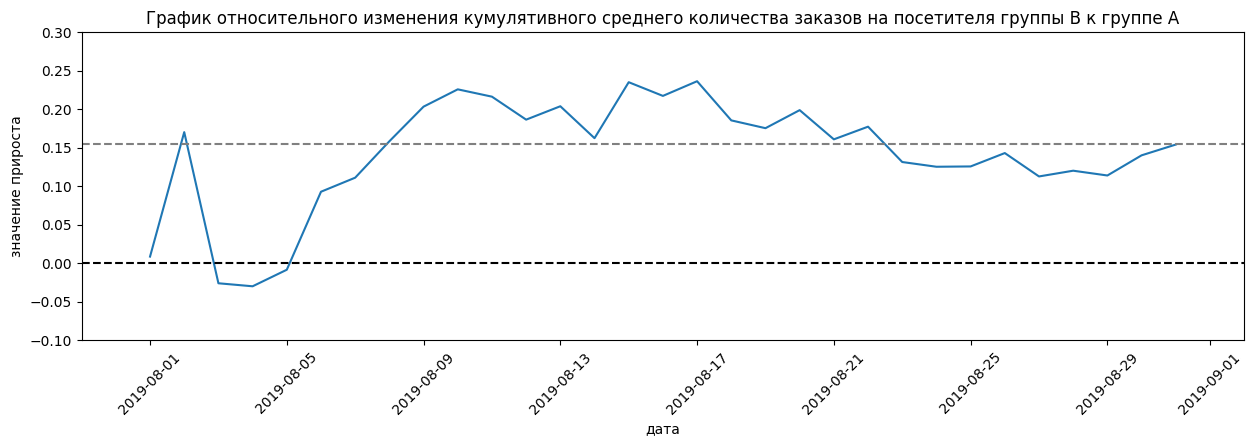

In [19]:
plt.figure(figsize=(15,4))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.155, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('дата')
plt.ylabel('значение прироста')
plt.xticks(rotation=45)
plt.axis([dt.datetime(2019, 7, 30), dt.datetime(2019, 9, 2), -0.5, 0.5])
plt.ylim([-0.1, 0.3]);

Группа В лидирует по изменению кумулятивного количества заказов на посетителя. Прирост составил около 15,5% относительно группы А.

### 2.7. Построим точечный график количества заказов по пользователям.<a id='section_id_7'></a>

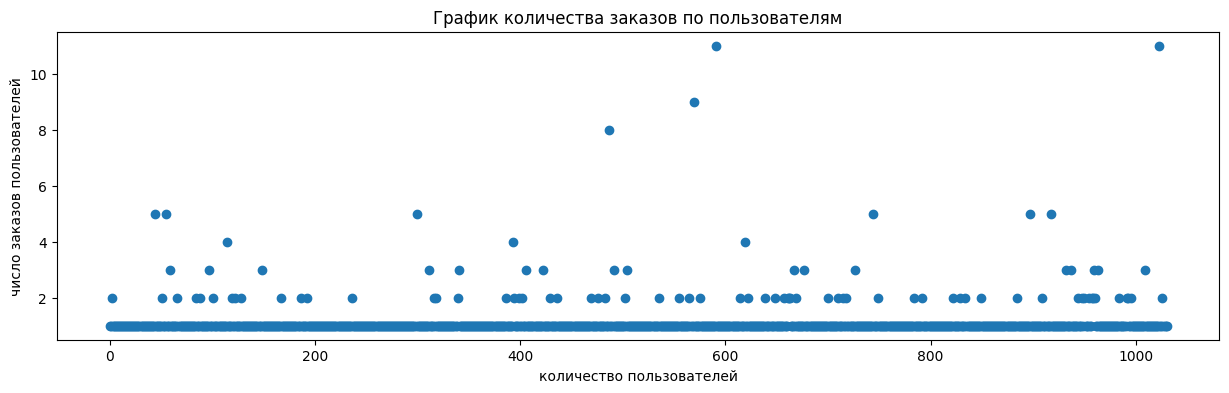

In [20]:
plt.figure(figsize=(15,4))
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('количество пользователей')
plt.ylabel('число заказов пользователей');

Пользователей, заказывших более 2-3-х раз не так много. Таких клиентов можно считать аномальными.

### 2.8. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.<a id='section_id_8'></a>

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не выше 1% пользователей совершили 4 и более заказов и не выше 5% больше 2 заказов. 3 и более заказов на одного пользователя можно считать за верхнюю границу числа заказов.

### 2.9. Построим точечный график стоимостей заказов.<a id='section_id_9'></a>

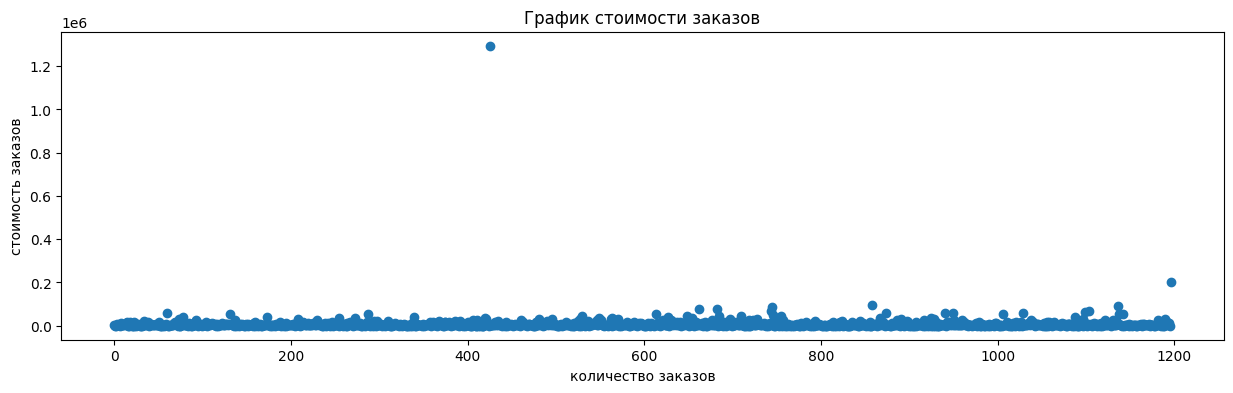

In [22]:
plt.figure(figsize=(15,4))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('количество заказов')
plt.ylabel('стоимость заказов');

На графике чётко виден один сильно аномальный заказ, который может давать большой вклад в общую картину. Посмотрим на результат графика без этого аномального заказа.

In [23]:
orders['revenue'].max()

1294500

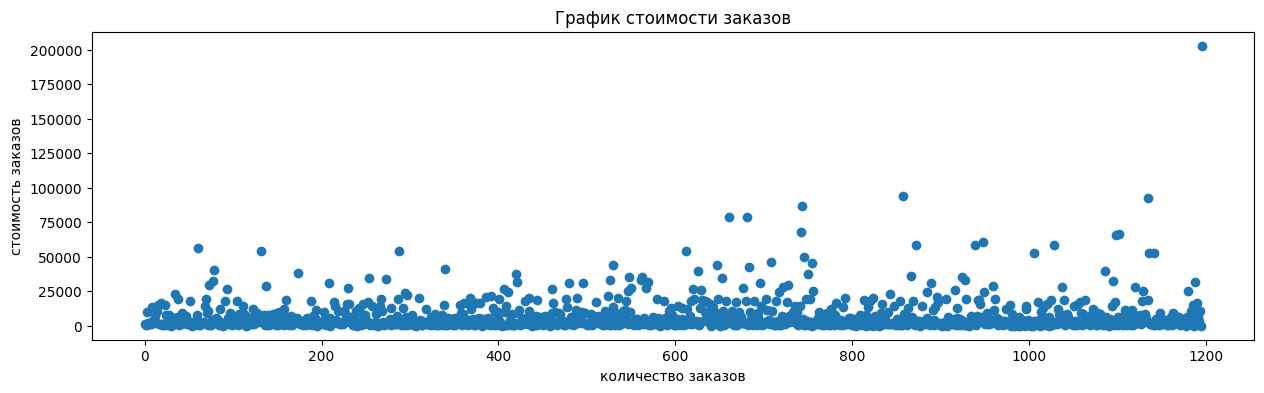

In [24]:
plt.figure(figsize=(15,4))
table = orders.loc[orders['revenue'] < 1294500]
x_values = pd.Series(range(0, len(table['revenue'])))
plt.scatter(x_values, table['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('количество заказов')
plt.ylabel('стоимость заказов');

Заказов, стоимостью более 50.000 рублей не очень много. Есть выбросы в районе 75.000, 100.000 и 200.000 рублей. Такие заказы крайне редки.

### 2.10. Посчитаем 95-й и 99-й перцентили стоимости заказов.<a id='section_id_10'></a>

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28.000 рублей и не более 1% дороже 58.233 рублей. Заказы дороже 30.000 рублей можно считать аномально большими и нехарактерными.

### 2.11. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.<a id='section_id_11'></a>

Сформулируем гипотезы.</br>
Гипотеза H<sub>0</sub>: различий в среднем количестве заказов между группами нет.</br>
Гипотеза H<sub>1</sub>: различия в среднем между группами есть.</br>

В наших данных критерии измерены количественно, выборки независимые, присутствует малое количество совпадающих значений в сравниваемых группах, в данных присутствуют выбросы, поэтому используем критерий Манна-Уитни.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
        name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительное различие: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01679
относительное различие: 0.138


Р-value оказалось меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ показывает, что среди групп по количеству заказов есть статистически значимые различия. Относительный прирост группы В к конверсии группы А составляет 13,8%.

### 2.12. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.<a id='section_id_12'></a>

В данном случае гипотезы будут звучать следующим образом:</br>
Гипотеза H<sub>0</sub>: различий в среднем чеке заказа между группами нет</br>
Гипотеза H<sub>1</sub>: различия в среднем чеке между группами есть</br>




In [28]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                   orders[orders['group']=='B']['revenue'])[1]))
print('относительное различие: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
относительное различие: 0.259


Р-value больше 0.05, значит различий в среднем чеке заказов между группами нет. Относительно различие среднего чека между сегментами 25,9%, достаточно много.

### 2.13. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.<a id='section_id_13'></a>

Гипотезы для среднего количества заказов сформулированы в пункте 10. 95 и 99 перцентили средних чеков оказались равны 28.000 и  58.233 рублей. Те же перцентили количества заказов - 2 и 4 заказов на пользователя. Примем за аномальных пользователей тех, кто совершил более 2-х заказов или совершивших заказ на сумму более 30.000 рублей.

In [29]:
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [30]:
np.percentile(ordersByUsers['orders'], 95)

2.0

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId']
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

* Посчитаем количество аномальных пользователей.

In [32]:
abnormalUsers.shape[0]

68

* Посчитаем относительные потери в процентах.

In [33]:
round(abnormalUsers.shape[0]/orders['visitorId'].nunique()*100, 3)

6.596

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
               visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01334
относительное различие: 0.172


Результаты недалеки от результатов того же теста для "сырых" данных. Сегмент В оказался лучше сегмента А.

### 2.14. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.<a id='section_id_14'></a>

In [35]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительное различие: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.720
относительное различие: -0.023


Р-value говорит о том, что различий в среднем чеке между группами нет.

### 2.15. Вывод теста.<a id='section_id_15'></a>

Результатом теста становится решение тест остановить. Группа В показала себя лучше группы А. Средняя сумма чека не меняется, но растёт количество заказов, значит растёт общая выручка.

## 3. Общий вывод.<a id='section_id_3.1'></a>

По данным крупного интернет-магазина нам было необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. По результатам фреймворка ICE для приоритезации гипотез оказалось, что 8, 0 и 7 гипотезы обладают наивысшим приоритетом. По результатам фреймворка RICE - 7, 2 и 0-я гипотезы. Гипотеза номер 2 имеет параметр reach равный 8, что помогло ей выйти вперёд в фреймворке RICE.

* График <u>кумулятивной выручки</u> по группам показал, что группа В сильно вышла вперёд в середине теста и продолжила расти до окончания тестирования. На данный рост могли влиять аномальные значения.
* График <u>кумулятивного среднего</u> чека подтвердил предыдущий график. На второй половине теста кумулятивный средний чек резко возрос.
* По результатам графика <u>относительного изменения кумулятивного среднего чека</u> группы В к группе А можно сказать, что изменение среднего чека резко менялись в некоторые даты теста. Скорее всего на эти изменения могли влиять нехарактерные покупки.
* График <u>конверсии кумулятивного среднего количества заказов</u> свидетельствует о бо́льшей конверсии сегмента В по сравнению с сегментом А.
* По <u>кумулятивному среднему количеству заказов</u> лидирует группа В и прирост по тесту составляет около 15,5%.
* Точечный график <u>количества заказов по пользователям</u> показал, что более 2-3 заказов клиенты делают крайне редко. 95 и 99 перцентили среднего количества заказов оказались равными 2 и 4 заказа соответственно.
* Точечный график <u>средней стоимости заказов</u> показал один невероятно аномальный заказ. Убрав его мы смогли посмотреть на распределение остальных заказов.  95 и 99 перцентили по заказам показали значения 28.000 и 58.233 соответственно. График проиллюстрировал эту картину. Было определено, что клиенты, которые делают более 2-х заказов или покупают на сумму, более 30.000 рублей являются аномальными.
* Уровень значимости p-value:
   * По сырым данным р-значение среднего количество заказов 0.01679, относительное различие 0.138.
   * По среднему чеку заказа р-значение 0.729, относительное различие 0.259. Далее значения были посчитаны по чистым данным.
   * Среднее количество заказов p = 0.01334, относительное различие 0.172.
   * Разница в среднем чеке р = 0.720, относительное различие -0.023.
     
По значениям сырых и чистых данных среднего количества заказов делаем вывод, что различия в среднем между группами есть и эта разница растёт. По результатам статистической значимости и относительных различий в среднем чеке заказа между группами оказалось, что средняя сумма не меняется. Группа В показала себя лучше группы А. Так как средняя сумма не меняется, а количество заказов растёт, то значит растёт общая выручка.